In [1]:
import pandas as pd

In [2]:
path = "/home/babis/mount/NLP"

In [14]:
my_cols = ["Title","Body","Tag2","Tag3","Tag4","Tag5","Tag6","Tag7","Tag8",
           "Tag9","Tag10","Tag11","Tag12","Tag13"]
fortune = pd.read_csv(path+"/fortune1.csv",names=my_cols,engine='python')

In [22]:
fortune.iloc[3].Body

' Στη ΓΕΚ ΤΕΡΝΑ μπαίνει σύμφωνα με πληροφορίες η οικογένεια της κυρίας Μαριάννας Λάτση. Εντός της ημέρας αναμένονται ανακοινώσεις καθώς τις τελευταίες ώρες συζητούνται οι λεπτομέρειες του deal. Οι πληροφορίες το προηγούμενο διάστημα ανέφεραν ότι η Reggeborgh Invest συζητούσε την πώληση ποσοστού της, ενδεχομένως και ολόκληρου, στην ΓΕΚ ΤΕΡΝΑ. Οι Ολλανδοί ελέγχουν το 30,2% της ΓΕΚ ΤΕΡΝΑ, ενώ συμμετέχουν και στην Ελλάκτωρ. Η συμμετοχή τους στην Ελλάκτωρ είναι μάλιστα αυτή που φαίνεται να οδηγεί τους Ολλανδούς σε επαναχάραξη της στρατηγικής τους προκειμένου να ξεπεράσουν το πρόβλημα ανταγωνισμού που δημιουργούνται από τη συμμετοχή τους και στις δύο κατασκευαστικές. Στην Ελλάκτωρ μέχρι τώρα συμμετέχουν με 14,1% και η νέα συμφωνία θα τους επιτρέψει να αυξήσουν το ποσοστό τους. Το έντονο ενδιαφέρον για τις κατασκευαστικές προκύπτει από το γεγονός ότι εισερχόμαστε σε μια περίοδο που αναμένονται πολλά έργα υποδομής από το Ταμείο Ανάκαμψης αλλά και από το ΕΣΠΑ. '

In [21]:
from gensim.models import Word2Vec

In [23]:
sentences = [["Στη","ΓΕΚ ΤΕΡΝΑ","μπαίνει","σύμφωνα","με","πληροφορίες","η","οικογένεια","της","κυρίας","Μαριάννας Λάτση"],
            ["Εντός", "της", "ημέρας", "αναμένονται", "ανακοινώσεις", "καθώς", "τις", "τελευταίες", "ώρες", "συζητούνται", "οι", "λεπτομέρειες", "του", "deal"],
            ["Οι","πληροφορίες", "το", "προηγούμενο", "διάστημα", "ανέφεραν", "ότι", "η", "Reggeborgh Invest", "συζητούσε", "την", "πώληση","ποσοστού", "της", "ενδεχομένως", "και", "ολόκληρου", "στην", "ΓΕΚ ΤΕΡΝΑ"],
            ["Οι", "Ολλανδοί", "ελέγχουν", "το","30.2%", "της", "ΓΕΚ ΤΕΡΝΑ", "ενώ", "συμμετέχουν", "και", "στην", "Ελλάκτωρ"],
            ["Η", "συμμετοχή", "τους", "στην", "Ελλάκτωρ", "είναι", "μάλιστα", "αυτή", "που", "φαίνεται", "να", "οδηγεί", "τους", "Ολλανδούς", "σε", "επαναχάραξη", "της", "στρατηγικής","τους","προκειμένου","να","ξεπεράσουν","το","πρόβλημα","ανταγωνισμού","που","δημιουργούνται","από","τη","συμμετοχή","τους","και","στις","δύο","κατασκευαστικές"]]

In [24]:
model = Word2Vec(sentences, min_count=1)

In [26]:
words = list(model.wv.vocab)

In [30]:
X = model[model.wv.vocab]

<ipython-input-30-c60322eee7e8>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X = model[model.wv.vocab]


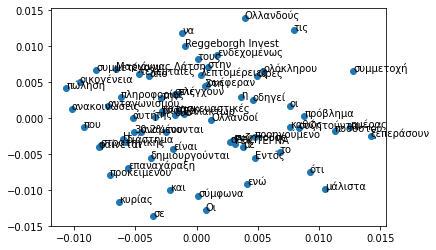

In [35]:
from sklearn.decomposition import PCA
from matplotlib import pyplot

pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()